Lab
==========================================
Unsupervised Learning: Dimensionality Reduction and Visualization
------------------------------------------
Alessandro D. Gagliardi  
*(adapted from Jake VanderPlas' tutorial)*

<img src="http://scikit-learn.org/stable/_static/ml_map.png" alt="Machine Learning Map" style="width: 800px;"/>

In [1]:
%matplotlib inline
import numpy as np
from itertools import cycle
from seaborn import plt
from sklearn.datasets import load_files

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Unsupervised learning is interested in situations in which X is available, but not y: data without labels.

A typical use case is to find hiden structure in the data.

Previously we worked on visualizing the iris data by plotting
pairs of dimensions by trial and error, until we arrived at
the best pair of dimensions for our dataset.  Here we will
use an unsupervised *dimensionality reduction* algorithm
to accomplish this more automatically.

By the end of this section you will

- Know how to instantiate and train an unsupervised dimensionality reduction algorithm:
  Principal Component Analysis (PCA)
- Know how to use PCA to visualize high-dimensional data

## Dimensionality Reduction: PCA

Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We'll perform PCA on the iris dataset that we saw before:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

PCA is performed using linear combinations of the original features
using a truncated Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=True)

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [23]:
pca.components_

array([[ 0.17650757, -0.04015901,  0.41812992,  0.17516725],
       [-1.33840478, -1.48757227,  0.35831476,  0.15229463]])

Other attributes are available as well:

In [5]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [6]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

Let us project the iris dataset along those first two dimensions:

In [7]:
X_pca = pca.transform(X)

PCA `normalizes` and `whitens` the data, which means that the data
is now centered on both components with unit variance:

In [8]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([ 0.,  0.])

In [9]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

Furthermore, the samples components do no longer carry any linear correlation:

In [12]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   1.60431801e-16],
       [  1.60431801e-16,   1.00000000e+00]])

Now we can visualize the results using the following utility function:

In [13]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

Now calling this function for our data, we see the plot:

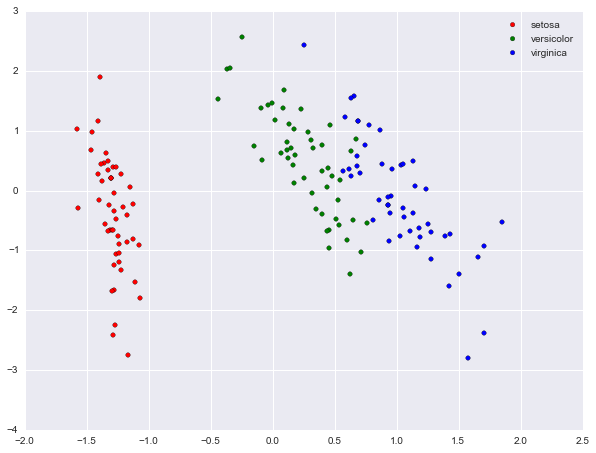

In [14]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the
singular value decomposition (SVD) of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
`sklearn.decomposition.RandomizedPCA` instead.

Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   fast non-exact PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
- [sklearn.decomposition.TruncatedSVD](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.TruncatedSVD.html): 
   linear dimensionality reduction by means of truncated singular value decomposition (SVD)

1-2 Pairs
=========
1. Randomized PCA
--------------------------------
#### Repeat the above dimensionality reduction with ``sklearn.decomposition.RandomizedPCA``.  
You can re-use the ``plot_PCA_2D`` function from above.  
Are the results similar to those from standard PCA?

In [71]:
from sklearn.decomposition import RandomizedPCA
Rpca = RandomizedPCA(n_components=2, whiten=True)
Rpca.fit(X)
print Rpca.components_

[[ 0.17650757 -0.04015901  0.41812992  0.17516725]
 [ 1.33840478  1.48757227 -0.35831476 -0.15229463]]


[ 0.92461621  0.05301557]


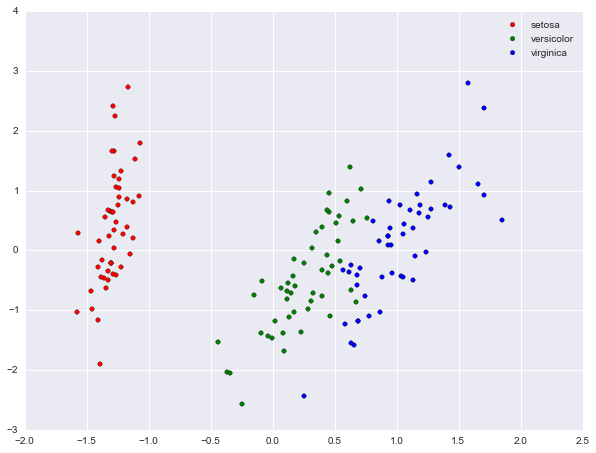

In [72]:
print _.explained_variance_ratio_
X_Rpca = Rpca.transform(X)
plot_PCA_2D(X_Rpca, iris.target, iris.target_names)

## 2. Dimension Reduction of Digits

Apply PCA (or RandomizedPCA?) to the Hand Written Digits dataset.

In [74]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [75]:
X, y = digits.data, digits.target

print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1797L, 64L), target shape: (1797L,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [78]:
n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

n_samples=1797
n_features=64


In [79]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        plt.subplot(1, data.shape[0], (i + 1))
        plt.imshow(data[i].reshape(shape), interpolation=interpolation)
        plt.title(labels[i])
        plt.xticks(()), plt.yticks(())

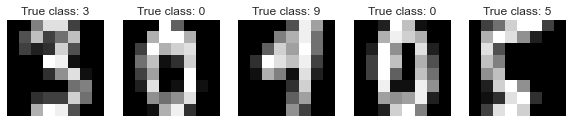

In [80]:
subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8, 8))

In [133]:
rpca2 = RandomizedPCA(whiten=True, random_state = 42)
rpca2.fit(X)
print rpca2.components_
print len(rpca2.components_)

[[  1.50977995e-17  -1.29410525e-03  -1.67041804e-02 ...,  -6.68518105e-03
   -2.73614983e-03  -8.57417599e-04]
 [  5.79653742e-18   7.90081548e-04   3.83725874e-03 ...,  -1.38134594e-02
   -1.52088946e-03   5.23539354e-04]
 [  3.34563611e-17  -1.54080918e-03  -1.06244636e-02 ...,  -1.94960203e-02
   -1.40309154e-02  -2.92371074e-03]
 ..., 
 [  8.22230727e+14   2.07126260e-03   4.45732369e-04 ...,  -8.63606464e-05
    3.07137460e-04  -9.10965528e-04]
 [  7.47332631e+11   7.66102508e-06   6.85574688e-07 ...,   1.56702786e-06
    6.52928274e-07  -1.79555275e-06]
 [ -2.08837265e+11   1.21009373e-05   5.65871171e-07 ...,  -1.30585655e-07
    5.65871171e-07  -1.20791731e-06]]
64


In [99]:
rpca2.explained_variance_ratio_.sum()

0.99999999999999933

In [100]:
rpca2.explained_variance_ratio_

array([  1.48905936e-01,   1.36187712e-01,   1.17945938e-01,
         8.40997942e-02,   5.78241466e-02,   4.91691032e-02,
         4.31598701e-02,   3.66137258e-02,   3.35324810e-02,
         3.07880621e-02,   2.37234084e-02,   2.27269657e-02,
         1.82186331e-02,   1.77385494e-02,   1.46710109e-02,
         1.40971560e-02,   1.31858920e-02,   1.24813782e-02,
         1.01771796e-02,   9.05617439e-03,   8.89538461e-03,
         7.97123157e-03,   7.67493255e-03,   7.22903569e-03,
         6.95888851e-03,   5.96081458e-03,   5.75614688e-03,
         5.15157582e-03,   4.89539777e-03,   4.28887968e-03,
         3.73606048e-03,   3.53274223e-03,   3.36683986e-03,
         3.28029851e-03,   3.08320884e-03,   2.93778629e-03,
         2.56588609e-03,   2.27742397e-03,   2.22277922e-03,
         2.11430393e-03,   1.89909062e-03,   1.58652907e-03,
         1.51159934e-03,   1.40578764e-03,   1.16622290e-03,
         1.07492521e-03,   9.64053065e-04,   7.74630271e-04,
         5.57211553e-04,

In [138]:
import pandas as pd

def pca_summary(prcomp):
    return pd.DataFrame([np.sqrt(prcomp.explained_variance_), 
              prcomp.explained_variance_ratio_, 
              prcomp.explained_variance_ratio_.cumsum()],
             index = ["Standard deviation", "Proportion of Variance", "Cumulative Proportion"], 
             columns = (map("PC{}".format, range(1, len(prcomp.components_)+1))))

In [142]:
pca_summary(rpca2).T

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.337562e+01,1.489059e-01,0.148906
PC2,1.279166e+01,1.361877e-01,0.285094
PC3,1.190418e+01,1.179459e-01,0.403040
PC4,1.005207e+01,8.409979e-02,0.487139
PC5,8.335135e+00,5.782415e-02,0.544964
PC6,7.686067e+00,4.916910e-02,0.594133
PC7,7.201088e+00,4.315987e-02,0.637293
PC8,6.632542e+00,3.661373e-02,0.673906
PC9,6.347327e+00,3.353248e-02,0.707439
PC10,6.082039e+00,3.078806e-02,0.738227


<Container object of 64 artists>

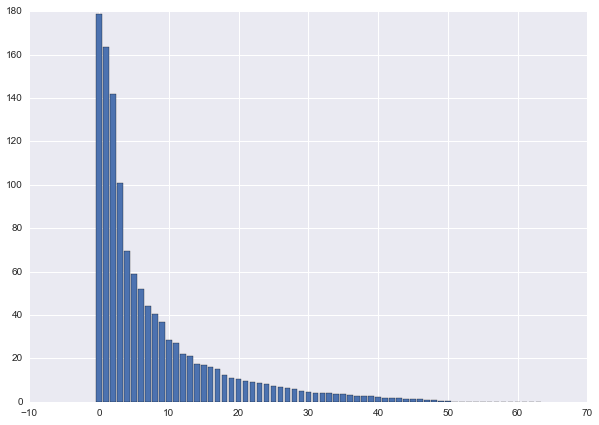

In [107]:
plt.figure(figsize=(10, 7))
plt.bar(range(0, 64), rpca2.explained_variance_, align='center')

In [109]:
rpca4 = RandomizedPCA(whiten=True, n_components = 4, random_state = 42)
rpca4.fit(X)
print rpca4.components_
print len(rpca4.components_)

[[ -1.06005442e-20  -1.29541152e-03  -1.67089244e-02  -1.01603697e-02
   -2.47682552e-03  -7.23087893e-03  -6.23874730e-04   1.69737289e-04
   -2.40017752e-05  -8.92542972e-03  -1.82733593e-02   1.11084353e-02
   -3.48992311e-03  -1.62791992e-02  -1.10846989e-03   3.34885337e-04
   -3.68450376e-06  -5.95026225e-03   6.23559872e-03   1.61398299e-02
   -1.28678442e-02  -1.22392316e-02   2.14080604e-03   3.16517886e-04
    7.37351056e-06   4.80155397e-03   1.89923537e-02  -2.66956206e-03
   -1.56607954e-02  -3.22882994e-03   3.83556534e-03   1.59552133e-05
   -0.00000000e+00   1.19567888e-02   2.75680967e-02   1.22952025e-02
    6.37037909e-03   2.78418197e-03   1.60990225e-03  -0.00000000e+00
    9.62400496e-05   7.99194262e-03   2.26566262e-02   1.85170886e-02
    1.56684121e-02   9.16089661e-04  -2.76776167e-03   1.20545882e-04
    5.17311408e-05  -6.26410266e-04  -4.18104006e-03   6.95577624e-03
    8.02414630e-03  -1.02958199e-02  -4.73667054e-03   7.21850139e-05
    7.08001665e-07  

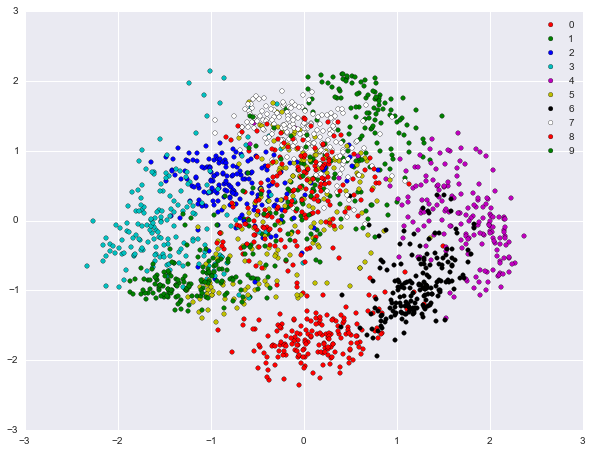

In [134]:
rpca_p = RandomizedPCA(whiten=True, n_components = 2, random_state = 42)
rpca_p.fit(X)
X_rpca_p = rpca_p.transform(X)
plot_PCA_2D(X_rpca_p, digits.target, digits.target_names)

In [153]:
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

def plot_PCA_3D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        Axes3D.plot(data[target == i, 0], data[target == i, 1], data[target == i, 2],
                   c=c, label=label)
    plt.legend()

In [154]:
rpca3 = RandomizedPCA(whiten=True, n_components = 3, random_state = 42)
rpca3.fit(X)
X_rpca3 = rpca3.transform(X)

plot_PCA_3D(X_rpca3, digits.target, digits.target_names)

TypeError: unbound method plot() must be called with Axes3D instance as first argument (got ndarray instance instead)

On your own
===========
Recall the newsgroups dataset we used in the [Text Feature Extraction for Classification](12-TextMining.ipynb) lab. Once we have extracted a vector representation of the data, it's a good idea to project the data on the first 2D of a Singular Value Decomposition (i.e.. Principal Component Analysis) to get a feel of the data. Note that the [TruncatedSVD](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.TruncatedSVD.html) class can accept `scipy.sparse` matrices as input (as an alternative to numpy arrays). Use it to visualize the first two principal components of the vectorized dataset. Color the output with the newsgroup names as we did with the iris data. Do you notice anything interesting about where `alt.atheism` and `talk.religion.misc` cluster relative to `sci.space`?

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
twenty_train_small = load_files('datasets/20news-bydate-train/', categories=categories, encoding='latin-1')
y_train = twenty_train_small.target

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)

X_train_small = vectorizer.fit_transform(twenty_train_small.data)